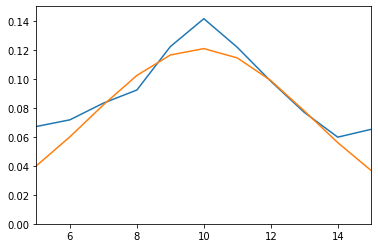

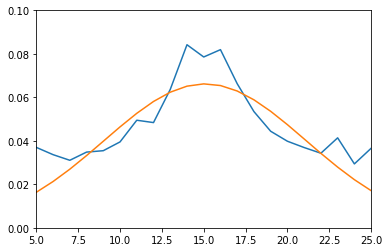

Media y Desviacion estandar para X: [9.90484381 3.29944286]

Media y Desviacion estandar para Y: [15.0794609   6.02693774]

Correlacion: 149.54281

Covarianza: 0.06669157001063919

Pearson: 0.0033537726960656752



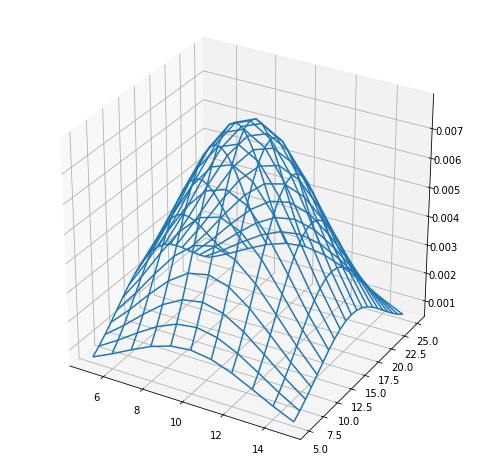

In [44]:
import numpy
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

#Se crean los dataframes de loas tablas
datos_xy = pd.read_csv('xy.csv')
df_xy = pd.DataFrame(datos_xy)

datos_xyp = pd.read_csv('xyp.csv')
df_p = pd.DataFrame(datos_xyp)


#Se definen las distribuciones

def normal(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x - mu)**2/(2*sigma**2))

#Se crean dos vectores para el eje x de las probabilidades marginales
x_x = np.array(range(5,16))
x_y = np.array(range(5,26))

# Estos son los valores u y sigma para los modelos encontrados mas adelante
mux = 9.90484381
sigmax = 3.29944286
muy = 15.0794609
sigmay = 6.02693774


######### Funciones de probabilidad Marginal ##########

######Marginal X#####
for i in range(0, len(df_xy)):
    df_xy.loc[i,'x'] = df_xy.loc[i, 'y5'] + df_xy.loc[i, 'y6'] + df_xy.loc[i, 'y7'] + df_xy.loc[i, 'y8'] + df_xy.loc[i, 'y9'] + df_xy.loc[i, 'y10'] + df_xy.loc[i, 'y11'] + df_xy.loc[i, 'y12'] + df_xy.loc[i, 'y13'] + df_xy.loc[i, 'y14'] + df_xy.loc[i, 'y15'] + df_xy.loc[i, 'y16'] + df_xy.loc[i, 'y17'] + df_xy.loc[i, 'y18']+ df_xy.loc[i, 'y19']+ df_xy.loc[i, 'y20']+ df_xy.loc[i, 'y21']+ df_xy.loc[i, 'y22']+ df_xy.loc[i, 'y23']+ df_xy.loc[i, 'y24']+ df_xy.loc[i, 'y25']

d_x = df_xy['x'].to_numpy()
type(d_x)

#Se grafica la marginal contra su respectivo modelo
plt.plot(x_x, d_x )
Norm_X = 1/(np.sqrt(2*np.pi*sigmax**2))*np.exp(-(x_x - mux)**2/(2*sigmax**2))
plt.plot(x_x, Norm_X)
plt.axis([5, 15, 0, 0.15])
plt.savefig('Grafica Marginal de X')
plt.show()


######Marginal Y#####
VectorY = [df_xy['y'+ str(i)].sum() for i in range(5,26)]
df_y = pd.DataFrame(VectorY)

#Se crea un vector para y dentro del dataframe original
for i in range(0, len(df_y)):
    df_xy.loc[i,'y'] = df_y.loc[i, 0]
    
d_y = df_xy['y'].to_numpy()
type(d_y)

#Se grafica la marginal contra su respectivo modelo
plt.plot(x_y, d_y)

Norm_Y = 1/(np.sqrt(2*np.pi*sigmay**2))*np.exp(-(x_y - muy)**2/(2*sigmay**2))
plt.plot(x_y, Norm_Y)
plt.axis([5, 25, 0, 0.1])
plt.savefig('Grafica Marginal de Y')
plt.show() 


############# Parametros de mejor ajuste para distribucion normal #########
paramX, _ = curve_fit(gaussiana, x_x, d_x)
paramY, _ = curve_fit(gaussiana, x_y, d_y )

print('Media y Desviacion estandar para X:',paramX)
print()
print('Media y Desviacion estandar para Y:', paramY)
print()
####### Correlacion ########
for i in range(0, len(df_p)):
    df_p.loc[i,'Corr'] = df_p.loc[i, 'x'] * df_p.loc[i, 'y'] * df_p.loc[i, 'p']
    
Correlacion = df_p['Corr'].sum()
print('Correlacion:', Correlacion)
print()    
######## Covarianza #######
for i in range(0, len(df_p)):
    df_p.loc[i,'Covar'] = (df_p.loc[i, 'x'] - mux) * (df_p.loc[i, 'y'] - muy) * df_p.loc[i, 'p']

Covarianza = df_p['Covar'].sum()
print('Covarianza:', Covarianza)
print()
####### Coef correlacion #####

Pearson = Covarianza / (sigmax * sigmay )
print('Pearson:', Pearson)
print()



######## Probabilidad de distribucion conjunta #########
X, Y = np.meshgrid(x_x, x_y)
Z = (1/(np.sqrt(2*np.pi*sigmax**2))*np.exp(-(X - mux)**2/(2*sigmax**2)))*(1/(np.sqrt(2*np.pi*sigmay**2))*np.exp(-(Y - muy)**2/(2*sigmay**2)))

####### Grafica de la distribucion conjunta ######

fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(10,10,1, projection ='3d')
ax.plot_wireframe(X, Y, Z, rstride =1, cstride=1, cmap='Blues')
plt.show()

